Implement machine learning using NumPy

In [6]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.tensorboard import SummaryWriter

In [7]:
np.random.seed(42)
x = np.linspace(-1, 1, 100).reshape(100, 1)
y = 3 * np.power(x, 2) + 2 + 0.2 * np.random.randn(x.size).reshape(100, 1)

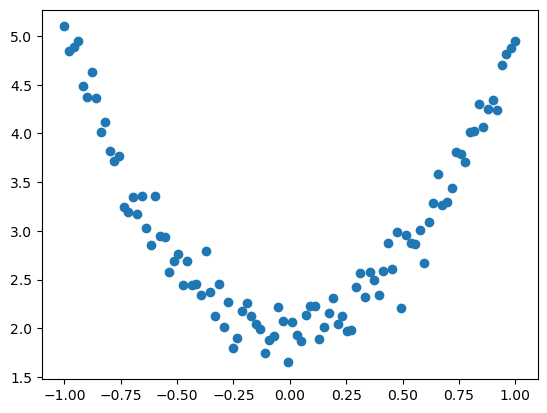

In [8]:
plt.scatter(x, y)
plt.show()

In [9]:
lr = 0.001
w1 = np.random.rand(1,1)
b1 = np.random.rand(1,1)

for i in range(800):
    y_pred = np.power(x,2) * w1 + b1
    loss = 0.5 * (y_pred - y) ** 2
    loss = loss.sum()
    
    grad_w = np.sum((y_pred - y) * np.power(x, 2))
    grad_b = np.sum((y_pred - y))
    
    # print("loss: ", loss)
    # print("grad_w: ", grad_w)
    # print("grad_b: ", grad_b)
    # print("w1: ", w1)
    # print("b1: ", b1)
    
    w1 = w1 - lr * grad_w
    b1 = b1 - lr * grad_b

In [10]:
print(w1, b1)

[[3.03428732]] [[1.96764264]]


In [11]:
w = torch.from_numpy(w1)
b = torch.from_numpy(b1)

In [12]:
loss_func = nn.MSELoss()
optimizer = optim.SGD([w, b], lr=0.001)

In [16]:
x = np.linspace(-1, 1, 100).reshape(100, 1)
y = 3 * np.power(x, 2) + 2 + 0.2 * np.random.randn(x.size).reshape(100, 1)

writer = SummaryWriter(log_dir='logs', comment='Linear')

x = torch.tensor(x, requires_grad=True)
y = torch.tensor(y, requires_grad=True)

for i in range(1000):
    optimizer.zero_grad()
    y_pred = x.pow(2) * w + b
    loss = loss_func(y_pred, y)
    loss.backward()
    optimizer.step()
    writer.add_scalar('loss', loss.item(), i)

print(w, b)

tensor([[3.0343]], dtype=torch.float64) tensor([[1.9676]], dtype=torch.float64)
